# Audi Car Price Prediction

## Today I am going to predict a Regression model dataset. I will be using 5 models to see which one is working perfectly 
--> Linear Regression

--> SVR

--> Random Forest Regressor

--> Extra Tree Regressor

--> Cat Boost Regressor

### Description
The Audi Car Price Prediction Dataset contains information about various Audi car models, including their specifications and prices. The dataset is designed to facilitate the development of predictive models for estimating the prices of Audi cars based on their features.

### Features
Model: The model name of the Audi car (e.g., A3, A4, Q5, etc).

Year: The manufacturing year of the car.

Price: The price of the car (target variable).

Transmission: The type of transmission system (e.g., manual, automatic, semi-auto).

Mileage: The total mileage (in kilometers) driven by the car.

Fuel Type: The type of fuel used by the car (e.g., petrol, diesel, hybrid).

Tax: The tax needed to pay while purchasing the vehicle

MPG: The fuel efficiency of the car, measured in miles per gallon.

Engine Size: The engine displacement size (in cubic centimeters) of the car.


In [271]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import os

In [272]:
df = pd.read_csv('audi.csv')
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0


In [273]:
df.shape

(10668, 9)

In [274]:
df.isnull().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

In [275]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10668 entries, 0 to 10667
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10668 non-null  object 
 1   year          10668 non-null  int64  
 2   price         10668 non-null  int64  
 3   transmission  10668 non-null  object 
 4   mileage       10668 non-null  int64  
 5   fuelType      10668 non-null  object 
 6   tax           10668 non-null  int64  
 7   mpg           10668 non-null  float64
 8   engineSize    10668 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 750.2+ KB


In [276]:
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,10668.000000,10668.000000,10668.000000,10668.000000,10668.000000,10668.000000
mean,2017.100675,22896.685039,24827.244001,126.011436,50.770022,1.930709
std,2.167494,11714.841888,23505.257205,67.170294,12.949782,0.602957
min,1997.000000,1490.000000,1.000000,0.000000,18.900000,0.000000
25%,2016.000000,15130.750000,5968.750000,125.000000,40.900000,1.500000
50%,2017.000000,20200.000000,19000.000000,145.000000,49.600000,2.000000
75%,2019.000000,27990.000000,36464.500000,145.000000,58.900000,2.000000
max,2020.000000,145000.000000,323000.000000,580.000000,188.300000,6.300000


In [277]:
df['transmission'].value_counts()

transmission
Manual       4369
Semi-Auto    3591
Automatic    2708
Name: count, dtype: int64

In [278]:
df['fuelType'].value_counts()

fuelType
Diesel    5577
Petrol    5063
Hybrid      28
Name: count, dtype: int64

In [279]:
df.nunique()

model             26
year              21
price           3260
transmission       3
mileage         7725
fuelType           3
tax               37
mpg              104
engineSize        19
dtype: int64

In [280]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['transmission'] = encoder.fit_transform(df['transmission'])

In [281]:
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,A1,2017,12500,1,15735,Petrol,150,55.4,1.4
1,A6,2016,16500,0,36203,Diesel,20,64.2,2.0
2,A1,2016,11000,1,29946,Petrol,30,55.4,1.4
3,A4,2017,16800,0,25952,Diesel,145,67.3,2.0
4,A3,2019,17300,1,1998,Petrol,145,49.6,1.0


#### transmission = 0 --> Manual
#### transmission = 1 --> Automatic
#### transmission = 2 --> Semi-Auto

In [282]:
df['fuelType'] = encoder.fit_transform(df['fuelType'])

In [283]:
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,A1,2017,12500,1,15735,2,150,55.4,1.4
1,A6,2016,16500,0,36203,0,20,64.2,2.0
2,A1,2016,11000,1,29946,2,30,55.4,1.4
3,A4,2017,16800,0,25952,0,145,67.3,2.0
4,A3,2019,17300,1,1998,2,145,49.6,1.0


### fuelType = 0 --> Diesel
### fuelType = 1 --> Hybrid
### fuelType = 2 --> Petrol

In [284]:
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,A1,2017,12500,1,15735,2,150,55.4,1.4
1,A6,2016,16500,0,36203,0,20,64.2,2.0
2,A1,2016,11000,1,29946,2,30,55.4,1.4
3,A4,2017,16800,0,25952,0,145,67.3,2.0
4,A3,2019,17300,1,1998,2,145,49.6,1.0


In [285]:
df['model'].nunique()

26

In [286]:
df['model'].unique()

array([' A1', ' A6', ' A4', ' A3', ' Q3', ' Q5', ' A5', ' S4', ' Q2',
       ' A7', ' TT', ' Q7', ' RS6', ' RS3', ' A8', ' Q8', ' RS4', ' RS5',
       ' R8', ' SQ5', ' S8', ' SQ7', ' S3', ' S5', ' A2', ' RS7'],
      dtype=object)

In [287]:
df['model'].value_counts()

model
 A3     1929
 Q3     1417
 A4     1381
 A1     1347
 A5      882
 Q5      877
 Q2      822
 A6      748
 Q7      397
 TT      336
 A7      122
 A8      118
 Q8       69
 RS6      39
 RS3      33
 RS4      31
 RS5      29
 R8       28
 S3       18
 SQ5      16
 S4       12
 SQ7       8
 S8        4
 S5        3
 A2        1
 RS7       1
Name: count, dtype: int64

In [288]:
encoded_data = encoder.fit_transform(df['model'])

In [289]:
encoded_class = encoder.classes_

In [290]:
for encoded_value, class_label in zip(encoded_data, df['model']):
    print(f"Encoded Value: {encoded_value}, Original Class: {class_label}")

Encoded Value: 0, Original Class:  A1
Encoded Value: 5, Original Class:  A6
Encoded Value: 0, Original Class:  A1
Encoded Value: 3, Original Class:  A4
Encoded Value: 2, Original Class:  A3
Encoded Value: 0, Original Class:  A1
Encoded Value: 5, Original Class:  A6
Encoded Value: 3, Original Class:  A4
Encoded Value: 2, Original Class:  A3
Encoded Value: 0, Original Class:  A1
Encoded Value: 2, Original Class:  A3
Encoded Value: 5, Original Class:  A6
Encoded Value: 9, Original Class:  Q3
Encoded Value: 2, Original Class:  A3
Encoded Value: 5, Original Class:  A6
Encoded Value: 2, Original Class:  A3
Encoded Value: 9, Original Class:  Q3
Encoded Value: 2, Original Class:  A3
Encoded Value: 10, Original Class:  Q5
Encoded Value: 9, Original Class:  Q3
Encoded Value: 4, Original Class:  A5
Encoded Value: 10, Original Class:  Q5
Encoded Value: 4, Original Class:  A5
Encoded Value: 5, Original Class:  A6
Encoded Value: 10, Original Class:  Q5
Encoded Value: 3, Original Class:  A4
Encoded V

In [291]:
for encoded_value, class_label in enumerate(encoded_class):
    print(f"Encoded Value: {encoded_value}, Class Label: {class_label}")

Encoded Value: 0, Class Label:  A1
Encoded Value: 1, Class Label:  A2
Encoded Value: 2, Class Label:  A3
Encoded Value: 3, Class Label:  A4
Encoded Value: 4, Class Label:  A5
Encoded Value: 5, Class Label:  A6
Encoded Value: 6, Class Label:  A7
Encoded Value: 7, Class Label:  A8
Encoded Value: 8, Class Label:  Q2
Encoded Value: 9, Class Label:  Q3
Encoded Value: 10, Class Label:  Q5
Encoded Value: 11, Class Label:  Q7
Encoded Value: 12, Class Label:  Q8
Encoded Value: 13, Class Label:  R8
Encoded Value: 14, Class Label:  RS3
Encoded Value: 15, Class Label:  RS4
Encoded Value: 16, Class Label:  RS5
Encoded Value: 17, Class Label:  RS6
Encoded Value: 18, Class Label:  RS7
Encoded Value: 19, Class Label:  S3
Encoded Value: 20, Class Label:  S4
Encoded Value: 21, Class Label:  S5
Encoded Value: 22, Class Label:  S8
Encoded Value: 23, Class Label:  SQ5
Encoded Value: 24, Class Label:  SQ7
Encoded Value: 25, Class Label:  TT


In [292]:
df['model'] = encoded_data

In [293]:
y = df.iloc[:,2:3]

In [294]:
X = df.iloc[:,[0,1,3,4,5,6,7,8]]

In [295]:
X.iloc[:,1:].corr()

,year,transmission,mileage,fuelType,tax,mpg,engineSize
year,1.000000,0.049203,-0.789667,0.122428,0.093066,-0.351281,-0.031582
transmission,0.049203,1.000000,-0.042341,0.082359,-0.000919,-0.014149,-0.020070
mileage,-0.789667,-0.042341,1.000000,-0.240984,-0.166547,0.395103,0.070710
fuelType,0.122428,0.082359,-0.240984,1.000000,0.101257,-0.301099,-0.370507
tax,0.093066,-0.000919,-0.166547,0.101257,1.000000,-0.635909,0.393075
mpg,-0.351281,-0.014149,0.395103,-0.301099,-0.635909,1.000000,-0.365621
engineSize,-0.031582,-0.020070,0.070710,-0.370507,0.393075,-0.365621,1.000000


<Axes: >

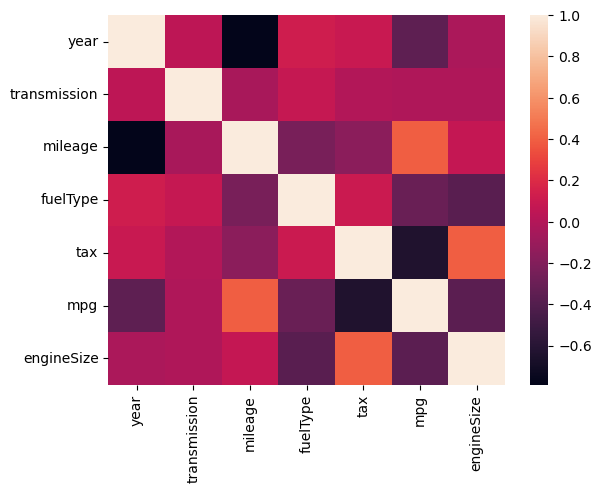

In [296]:
sns.heatmap(X.iloc[:,1:].corr())

In [297]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0) 

In [298]:
X_train

,model,year,transmission,mileage,fuelType,tax,mpg,engineSize
4929,0,2017,1,19229,2,30,56.5,1.4
9420,8,2019,0,6826,2,145,33.2,2.0
8756,0,2014,2,18954,2,125,53.3,1.4
9758,25,2014,1,27400,2,265,35.8,2.0
9341,2,2019,0,750,0,145,52.3,1.6
...,...,...,...,...,...,...,...,...
9225,4,2016,0,106000,0,200,44.8,3.0
4859,10,2019,2,9415,0,150,38.2,2.0
3264,9,2017,2,23188,0,145,53.3,2.0
9845,25,2017,1,33105,2,145,47.1,1.8


## We will be using Linear Regression, SVR, Random Forest Regressor, Extra Tree Regressor and Cat Boost Regressor 

### Linear Regression

In [299]:
from sklearn.linear_model import LinearRegression
lrmodel = LinearRegression()

In [300]:
lrmodel.fit(X_train, y_train)

LinearRegression()

In [301]:
lry_pred = lrmodel.predict(X_test)

In [302]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
print(r2_score(lry_pred, y_test))
print(mean_squared_error(lry_pred, y_test))
print(mean_absolute_error(lry_pred, y_test))

0.7394834440270275
29225405.68320192
3431.2696131137227


### Support Vector Regressor

In [303]:
from sklearn.svm import SVR
svrmodel = SVR()

In [304]:
y_train = y_train.values

In [305]:
y_train = y_train.ravel()

In [306]:
svrmodel.fit(X_train, y_train)

SVR()

In [307]:
svry_pred = svrmodel.predict(X_test)

In [308]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
print(r2_score(svry_pred, y_test))
print(mean_squared_error(svry_pred, y_test))
print(mean_absolute_error(svry_pred, y_test))

-114.03415083996227
131853501.72903794
7621.4856981989


### Random Forest Regressor

In [309]:
from sklearn.ensemble import RandomForestRegressor

In [310]:
rfrmodel = RandomForestRegressor(random_state = 0)

In [311]:
rfrmodel.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [312]:
rfry_pred = rfrmodel.predict(X_test)

In [313]:
print(r2_score(rfry_pred, y_test))
print(mean_squared_error(rfry_pred, y_test))
print(mean_absolute_error(rfry_pred, y_test))

0.9518375004333299
6462709.30640574
1560.2109617717244


#### Random Forest Regressor with Randomize Search CV

In [358]:
from sklearn.model_selection import RandomizedSearchCV

In [359]:
rfrrscvmodel = RandomForestRegressor()

In [360]:
rscv_params = {
    'n_estimators' : [int(x) for x in np.linspace(start = 80, stop = 1500, num = 10)],
    'max_features' : ['auto', 'sqrt'],
    'max_depth' : [int(x) for x in np.linspace(6, 45, num = 5)],
    'min_samples_split' : [2, 5, 10, 15, 100],
    'min_samples_leaf' : [1, 2, 5, 10]
}

In [361]:
rscvrfrmodel = RandomizedSearchCV(estimator = rfrrscvmodel, param_distributions = rscv_params, scoring='neg_mean_squared_error',n_iter=3,cv=3,random_state=42, n_jobs = -1)

In [362]:
%%time
rscvrfrmodel.fit(X_train, y_train)

C:\Users\kiran\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


CPU times: total: 2.62 s
Wall time: 31.3 s


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=3, n_jobs=-1,
                   param_distributions={'max_depth': [6, 15, 25, 35, 45],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [80, 237, 395, 553, 711,
                                                         868, 1026, 1184, 1342,
                                                         1500]},
                   random_state=42, scoring='neg_mean_squared_error')

In [363]:
rscvrfrmodel.best_params_

{'n_estimators': 80,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 25}

In [364]:
rscvrfrmodel.best_score_

-6161233.461094737

In [365]:
rscvrfry_pred = rscvrfrmodel.predict(X_test)

In [366]:
print(r2_score(rscvrfry_pred, y_test))
print(mean_squared_error(rscvrfry_pred, y_test))
print(mean_absolute_error(rscvrfry_pred, y_test))

0.9509484751537338
6548521.01684727
1561.7020157003294


#### Random Forest Regressor with Grid Search CV

In [324]:
from sklearn.model_selection import GridSearchCV

In [325]:
rfrgscvmodel = RandomForestRegressor()

In [326]:
gscv_params = {
    'n_estimators' : [int(x) for x in np.linspace(start = 80, stop = 1500, num = 10)],
    'max_features' : ['auto', 'sqrt'],
    'max_depth' : [int(x) for x in np.linspace(6, 45, num = 5)],
    'min_samples_split' : [2, 5, 10, 15, 100],
    'min_samples_leaf' : [1, 2, 5, 10]
}

In [327]:
rfrgscvmodel = GridSearchCV(estimator = rfrgscvmodel, param_grid = gscv_params, scoring='neg_mean_squared_error', cv=5, n_jobs = -1)

In [353]:
%%time
rfrgscvmodel.fit(X_train, y_train)

CPU times: total: 38.7 s
Wall time: 3h 34min 1s


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [6, 15, 25, 35, 45],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 5, 10],
                         'min_samples_split': [2, 5, 10, 15, 100],
                         'n_estimators': [80, 237, 395, 553, 711, 868, 1026,
                                          1184, 1342, 1500]},
             scoring='neg_mean_squared_error')

In [354]:
rfrgscvmodel.best_params_

{'max_depth': 15,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 553}

In [355]:
rfrgscvmodel.best_score_

-5394565.192422843

In [356]:
rfrgscvy_pred = rfrgscvmodel.predict(X_test)

In [357]:
print(r2_score(rfrgscvy_pred, y_test))
print(mean_squared_error(rfrgscvy_pred, y_test))
print(mean_absolute_error(rfrgscvy_pred, y_test))

0.957448694808257
5452048.110696211
1481.934982651576


#### Both the CrossValidation models are used for hyperparameter tuning but the reason behind using both GridSearchCV and RandomizeSearchCV is 

GridSearchCV exhaustively tries all the possible combinations of hyperparameters whereas RandomizeSearchCV samples a fixed number of hyperparameter setting from the specified probability distribution

GridSearchCV guarantees to find the best combination of hyperparameters within the specified search space whereas RandomizeSearchCV may not guarantee to find the absolute best combination of hyperparameters, it often finds a good set of hyperparameters in a much shorter time compared to GridSearchCV.

Thats the reason of GridSearchCV taking more time to execute compared to RandomizeSearchCV

GridsearchCV execution time --> 3h 34min

RandomizeSearchCV execution time --> 31s

### Extra Tree Regressor

In [367]:
from sklearn.ensemble import ExtraTreesRegressor

In [368]:
etrmodel = ExtraTreesRegressor()

In [369]:
etrmodel.fit(X_train, y_train)

ExtraTreesRegressor()

In [370]:
etry_pred = etrmodel.predict(X_test)

In [371]:
print(r2_score(etry_pred, y_test))
print(mean_squared_error(etry_pred, y_test))
print(mean_absolute_error(etry_pred, y_test))

0.9566041802470104
5811769.070610439
1539.2543658231803


### Cat Boost Regressor

Soo, before using this model we need to install it first

In [62]:
pip install catboost

  Obtaining dependency information for catboost from https://files.pythonhosted.org/packages/e8/37/3afd3c02798734efcd7840bfa872d3efc06f5d5c92f9613fea3ff5b4311f/catboost-1.2.3-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/101.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/101.1 MB 1.9 MB/s eta 0:00:53
   ---------------------------------------- 0.0/101.1 MB 1.9 MB/s eta 0:00:53
   ---------------------------------------- 0.1/101.1 MB 327.7 kB/s eta 0:05:09
   ---------------------------------------- 0.1/101.1 MB 327.7 kB/s eta 0:05:09
   ---------------------------------------- 0.1/101.1 MB 327.7 kB/s eta 0:05:09
   ---------------------------------------- 0.1/101.1 MB 327.7 kB/s eta 0:05:09
   ---------------------------------------- 0.1/101.1 MB 359.9 kB/s eta 0:04:41
   ---------------------------------------- 0.1/101.1 MB 327.7 kB/s eta 0:05:08
   ---------------------------------------- 0.2/101.1 MB 377.4 kB/s eta 0:04:28
   

In [372]:
from catboost import CatBoostRegressor

In [373]:
catmodel = CatBoostRegressor()

CatBoost is particularly renowned for its ability to handle categorical features effectively without requiring preprocessing like one-hot encoding or label encoding

Soo, now I will be splitting the dataset again without encoding the data since, I have encoded 3 features i.e., 'fuel', 'model', 'transmission' and now I will not be using that

In [374]:
dfcat = pd.read_csv('audi.csv')
dfcat.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0


In [375]:
dfcat.shape

(10668, 9)

In [376]:
Xa = dfcat.iloc[:,[0,1,3,4,5,6,7,8]]
ya = dfcat.iloc[:,2:3]

In [377]:
Xa.shape

(10668, 8)

In [378]:
ya.shape

(10668, 1)

In [379]:
from sklearn.model_selection import train_test_split
Xa_train, Xa_test, ya_train, ya_test = train_test_split(Xa, ya, test_size = 0.2, random_state = 0)

Soo, now we need to convert the ya_test dataset to 1d array in order to ignore future errors

In [380]:
ya_test = ya_test.values

In [381]:
ya_test = ya_test.ravel()
ya_test

array([14998, 21950, 28990, ..., 45995, 30500,  8400], dtype=int64)

Successfully converted into 1D array

In [382]:
catmodel.fit(Xa_train, ya_train)

CatBoostError: Bad value for num_feature[non_default_doc_idx=0,feature_idx=0]=" A1": Cannot convert 'b' A1'' to float

I guess there must be some error which the model lead to unable to encode the 'model' column, so unfortunately we will be drping this idea and wil be continueing with the previous train test split or else I am having less knowledge about this model

In [383]:
catmodel.fit(X_train, y_train)

Learning rate set to 0.057452
0:	learn: 11185.5009459	total: 23ms	remaining: 22.9s
1:	learn: 10679.1558021	total: 26.9ms	remaining: 13.4s
2:	learn: 10212.3219288	total: 31.2ms	remaining: 10.4s
3:	learn: 9776.3751909	total: 35.2ms	remaining: 8.77s
4:	learn: 9381.2217931	total: 39.3ms	remaining: 7.82s
5:	learn: 8991.9951541	total: 43.2ms	remaining: 7.16s
6:	learn: 8643.3849406	total: 47.4ms	remaining: 6.72s
7:	learn: 8299.5394024	total: 51.3ms	remaining: 6.36s
8:	learn: 7975.3249081	total: 55.2ms	remaining: 6.08s
9:	learn: 7666.7576819	total: 59.2ms	remaining: 5.86s
10:	learn: 7367.8433383	total: 63.3ms	remaining: 5.69s
11:	learn: 7101.3839444	total: 67.1ms	remaining: 5.53s
12:	learn: 6849.6977688	total: 71.1ms	remaining: 5.4s
13:	learn: 6599.7478169	total: 75.9ms	remaining: 5.35s
14:	learn: 6379.3315057	total: 79.8ms	remaining: 5.24s
15:	learn: 6168.5692078	total: 83.9ms	remaining: 5.16s
16:	learn: 5973.4290813	total: 87.8ms	remaining: 5.08s
17:	learn: 5788.5152318	total: 92ms	remaining

In [384]:
caty_pred = catmodel.predict(X_test)

In [385]:
print(r2_score(caty_pred, y_test))
print(mean_squared_error(caty_pred, y_test))
print(mean_absolute_error(caty_pred, y_test))

0.9636310859243442
4809524.71579828
1438.9059250244693


### Displaying all the model's r2_score, Mean_squared_error and Mean_absolute_error

In [386]:
print('Linear Regression')
print('R-Squared Score', r2_score(lry_pred, y_test))
print('Mean_Squared_Error', mean_squared_error(lry_pred, y_test))
print('Mean_Absolute_Error', mean_absolute_error(lry_pred, y_test))
print()

print('SVR')
print('R-Squared Score', r2_score(svry_pred, y_test))
print('Mean_Squared_Error', mean_squared_error(svry_pred, y_test))
print('Mean_Absolute_Error', mean_absolute_error(svry_pred, y_test))
print()

print('Random Forest Regressor')
print('R-Squared Score', r2_score(rfry_pred, y_test))
print('Mean_Squared_Error', mean_squared_error(rfry_pred, y_test))
print('Mean_Absolute_Error', mean_absolute_error(rfry_pred, y_test))
print()

print('Random Forest Regressor using Randomize Search CV')
print('R-Squared Score', r2_score(rscvrfry_pred, y_test))
print('Mean_Squared_Error', mean_squared_error(rscvrfry_pred, y_test))
print('Mean_Absolute_Error', mean_absolute_error(rscvrfry_pred, y_test))
print()

print('Random Forest Regressor using Grid Search CV')
print('R-Squared Score', r2_score(rfrgscvy_pred, y_test))
print('Mean_Squared_Error', mean_squared_error(rfrgscvy_pred, y_test))
print('Mean_Absolute_Error', mean_absolute_error(rfrgscvy_pred, y_test))
print()

print('Extra Tree Regressor')
print('R-Squared Score', r2_score(etry_pred, y_test))
print('Mean_Squared_Error', mean_squared_error(etry_pred, y_test))
print('Mean_Absolute_Error', mean_absolute_error(etry_pred, y_test))
print()

print('Cat Boost Regressor')
print('R-Squared Score', r2_score(caty_pred, y_test))
print('Mean_Squared_Error', mean_squared_error(caty_pred, y_test))
print('Mean_Absolute_Error', mean_absolute_error(caty_pred, y_test))

Linear Regression
R-Squared Score 0.7394834440270275
Mean_Squared_Error 29225405.68320192
Mean_Absolute_Error 3431.2696131137227

SVR
R-Squared Score -114.03415083996227
Mean_Squared_Error 131853501.72903794
Mean_Absolute_Error 7621.4856981989

Random Forest Regressor
R-Squared Score 0.9518375004333299
Mean_Squared_Error 6462709.30640574
Mean_Absolute_Error 1560.2109617717244

Random Forest Regressor using Randomize Search CV
R-Squared Score 0.9509484751537338
Mean_Squared_Error 6548521.01684727
Mean_Absolute_Error 1561.7020157003294

Random Forest Regressor using Grid Search CV
R-Squared Score 0.957448694808257
Mean_Squared_Error 5452048.110696211
Mean_Absolute_Error 1481.934982651576

Extra Tree Regressor
R-Squared Score 0.9566041802470104
Mean_Squared_Error 5811769.070610439
Mean_Absolute_Error 1539.2543658231803

Cat Boost Regressor
R-Squared Score 0.9636310859243442
Mean_Squared_Error 4809524.71579828
Mean_Absolute_Error 1438.9059250244693


## Creating Pickle File

In [350]:
import pickle 
pickle.dump(catmodel, open('model.pkl','wb'))

In [392]:
model=pickle.load(open('model.pkl','rb'))
print (model.predict (X_test))

[13364.92184756 24244.56730406 27964.98679055 ... 46818.6680263
 31730.82502629  9356.64383379]
